# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import r2_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [2]:
STATE = 12345

## Загрузка и подготовка данных

In [3]:
data_0 = pd.read_csv('/Users/FunnyFunFruit/Desktop/Project_Geo_Oil/geo_data_0.csv')

In [4]:
data_0.sample(5)

,id,f0,f1,f2,product
78550,mFE29,-0.659700,0.676928,1.651576,94.617737
37339,pGwlH,1.650882,-0.194144,2.050160,103.914626
85783,TvsEY,-0.407310,0.660250,2.766786,114.711601
10266,Pkwep,1.303006,-0.445062,2.370794,133.050169
38909,OTsNg,-0.991313,-0.020832,1.974781,125.327630


In [5]:
#Выведем на экран основную информацию о датасете
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
#Посмотрим количество пропусков в датасете
data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

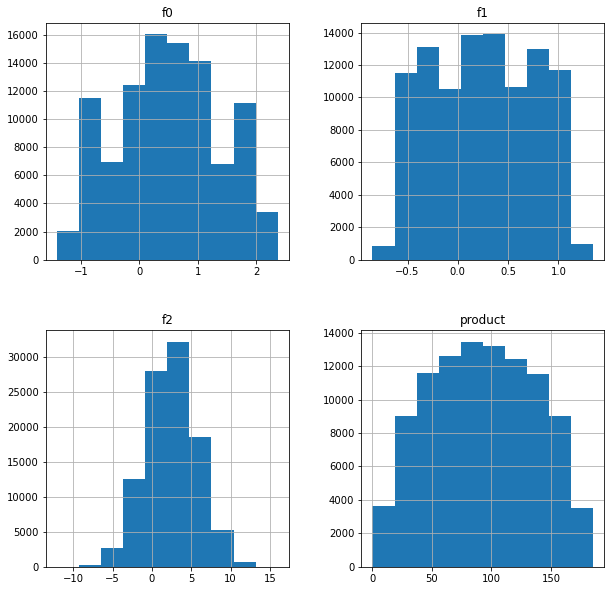

In [7]:
#Выведем гистограммы
data_0.hist(figsize=(10,10));

In [8]:
#Удалим столбец id, так как он неинформативен для модели
data_0.drop('id', axis=1, inplace=True)
data_0.columns

Index(['f0', 'f1', 'f2', 'product'], dtype='object')

In [9]:
features_0 = data_0.drop('product', axis=1)
target_0 = data_0['product']

In [10]:
features_0_train, features_0_valid, target_0_train, target_0_valid = train_test_split(features_0, target_0, test_size=0.25,
                                                                                      random_state=STATE)

scaler_0 = StandardScaler()
features_0_train = scaler_0.fit_transform(features_0_train)
features_0_valid = scaler_0.transform(features_0_valid)

То же самое сделаем для двух других регионов

In [11]:
data_1 = pd.read_csv('/Users/FunnyFunFruit/Desktop/Project_Geo_Oil/geo_data_1.csv')
data_2 = pd.read_csv('/Users/FunnyFunFruit/Desktop/Project_Geo_Oil/geo_data_2.csv')

In [12]:
data_1.sample(5)

,id,f0,f1,f2,product
24667,tq0Vb,-12.995352,-3.002370,0.002173,3.179103
77797,j7pNz,9.550264,1.763144,0.999337,26.953261
48156,Vg0MX,-3.409155,-10.560843,0.996944,30.132364
36697,aMgRb,-0.333750,3.279738,4.007467,107.813044
57785,8jetG,18.525137,-7.822688,2.999639,80.859783


In [13]:
data_2.sample(5)

,id,f0,f1,f2,product
33435,g5qIq,-0.324912,-1.267790,1.668134,95.631948
93897,HZ4kh,-0.992761,2.236462,0.258551,54.084934
58171,dLrqd,0.167278,-4.715581,8.079347,184.590734
50678,gNrm2,-1.793433,-2.201092,-1.192833,127.652400
37333,clngc,-2.631332,-0.587502,8.008499,111.810508


In [14]:
data_1.drop('id', axis=1, inplace=True)
data_2.drop('id', axis=1, inplace=True)

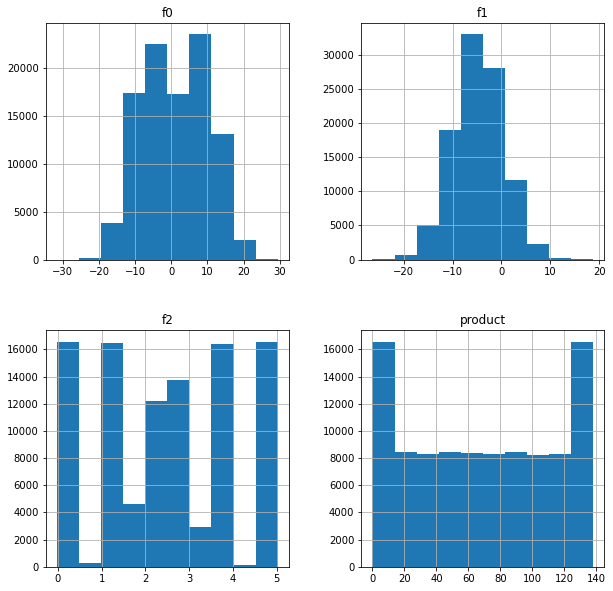

In [15]:
data_1.hist(figsize=(10,10));

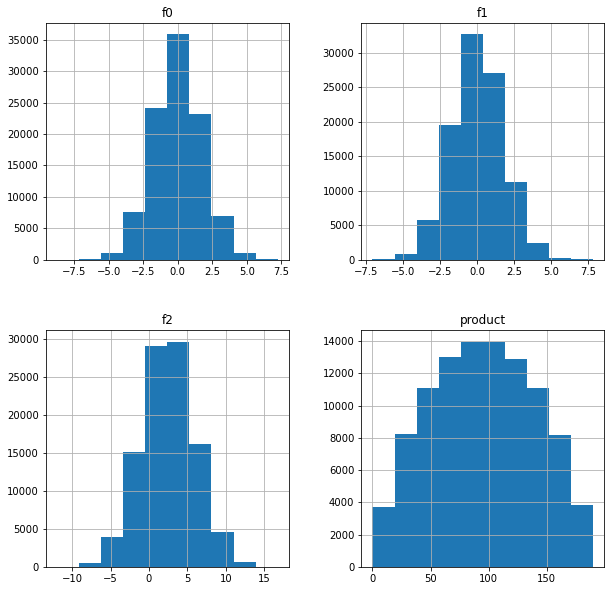

In [16]:
data_2.hist(figsize=(10,10));

In [17]:
data_1.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

In [18]:
data_2.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']

features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(features_1, target_1, test_size=0.25, 
                                                                                      random_state=STATE)

scaler_1 = StandardScaler()
features_1_train = scaler_1.fit_transform(features_1_train)
features_1_valid = scaler_1.transform(features_1_valid)

features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(features_2, target_2, test_size=0.25,
                                                                                      random_state=STATE)

scaler_2 = StandardScaler()
features_2_train = scaler_2.fit_transform(features_2_train)
features_2_valid = scaler_2.transform(features_2_valid)

## Обучение и проверка модели

In [20]:
model_0 = LinearRegression(n_jobs=-1)
model_0.fit(features_0_train, target_0_train)
#model_0.score(features_0_valid, target_0_valid)
prediction_0 = model_0.predict(features_0_valid)
mse_0 = mean_squared_error(target_0_valid, prediction_0)
print('RMSE_0:', math.sqrt(mse_0))
print('Mean prediction 0:', prediction_0.mean())
print('R2 score:', r2_score(target_0_valid, prediction_0))

RMSE_0: 37.5794217150813
Mean prediction 0: 92.59256778438035
R2 score: 0.27994321524487786


In [21]:
model_1 = LinearRegression(n_jobs=-1)
model_1.fit(features_1_train, target_1_train)
prediction_1 = model_1.predict(features_1_valid)
mse_1 = mean_squared_error(target_1_valid, prediction_1)
print('RMSE_1:', math.sqrt(mse_1))
print('Mean prediction 1:', prediction_1.mean())
print('R2 score:', r2_score(target_1_valid, prediction_1))

RMSE_1: 0.893099286775617
Mean prediction 1: 68.728546895446
R2 score: 0.9996233978805127


In [22]:
model_2 = LinearRegression(n_jobs=-1)
model_2.fit(features_2_train, target_2_train)
prediction_2 = model_2.predict(features_2_valid)
mse_2 = mean_squared_error(target_2_valid, prediction_2)
print('RMSE_2:', math.sqrt(mse_2))
print('Mean prediction 2:', prediction_2.mean())
print('R2 score:', r2_score(target_2_valid, prediction_2))

RMSE_2: 40.02970873393434
Mean prediction 2: 94.96504596800489
R2 score: 0.20524758386040443


*Проанализировав метрики регрессионных моделей можно сказать, что наиболее точно остатки нефти модель предсказывает в регионе под номером 1, метрика R2 составила 0.999, что является практически идеальным результатом. Однако, такого нельзя сказать о двух других моделях: тут метрики составили 0.279 и 0.205 у регионов под номерами 0 и 2 соответственно.*

## Подготовка к расчёту прибыли

In [23]:
#Рассчитаем объем нефти в скважине, необходимый для безубыточной разработки скважины
EXPENCES = 10000000000
OIL_PRICE = 450000
VOL = (EXPENCES / 200) / OIL_PRICE
VOL

111.11111111111111

*Из расчета объем нефти для безубыточной разработки скважины составляет 111 единиц продукта. Данное значение является меньше, чем средние значения скважин, предсказанные моделью. Можно сделать вывод о том, что случайно выбранные скважины для разработки могут оказаться убыточными*

In [24]:
#Функция расчета прибыли
def profit(volume, oil_price, expences):
    profit = (volume * oil_price) - expences
    return profit

## Расчёт прибыли и рисков 

*Применим технику Bootstrap для каждого из регионов и найдем среднюю прибыль, а также риск убытков и 95% доверительный интервал*

In [25]:
N = 1000

In [26]:
profit_0 = []
for i in range(N):
    features_0_bs, target_0_bs = resample(features_0_valid, target_0_valid, n_samples=500, replace=True)
    features_0_bs = pd.DataFrame(features_0_bs)
    target_0_bs.reset_index(drop=True, inplace=True)
    predictions_0_bs = model_0.predict(features_0_bs)
    predictions_0_bs = pd.Series(predictions_0_bs)
    predictions_0_bs.sort_values(ascending=False, inplace=True)
    predictions_0_200 = predictions_0_bs[:200]
    target_0_200 = []
    for index in predictions_0_200.index:    
        target_0_200.append(target_0_bs[index])
    profit_0.append(profit(sum(target_0_200), OIL_PRICE, EXPENCES))
profit_0 = pd.Series(profit_0)
upper = profit_0.quantile(0.975)
lower = profit_0.quantile(0.025)
print('Средняя прибыль региона 0:', profit_0.mean())
print('Риск убытков:', (profit_0 < 0).mean())
print('97.5% доверительный интервал:', upper)
print('2.5% доверительный интервал', lower)

Средняя прибыль региона 0: 384666703.2900648
Риск убытков: 0.071
97.5% доверительный интервал: 901632218.7241417
2.5% доверительный интервал -116599223.08991842


In [27]:
profit_1 = []
for i in range(N):
    features_1_bs, target_1_bs = resample(features_1_valid, target_1_valid, n_samples=500, replace=True)
    features_1_bs = pd.DataFrame(features_1_bs)
    target_1_bs.reset_index(drop=True, inplace=True)
    predictions_1_bs = model_1.predict(features_1_bs)
    predictions_1_bs = pd.Series(predictions_1_bs)
    predictions_1_bs.sort_values(ascending=False, inplace=True)
    predictions_1_200 = predictions_1_bs[:200]
    target_1_200 = []
    for index in predictions_1_200.index:    
        target_1_200.append(target_1_bs[index])
    profit_1.append(profit(sum(target_1_200), OIL_PRICE, EXPENCES))
profit_1 = pd.Series(profit_1)
upper = profit_1.quantile(0.975)
lower = profit_1.quantile(0.025)
print('Средняя прибыль региона 1:', profit_1.mean())
print('Риск убытков:', (profit_1 < 0).mean())
print('97.5% доверительный интервал:', upper)
print('2.5% доверительный интервал', lower)

Средняя прибыль региона 1: 451874544.77416044
Риск убытков: 0.015
97.5% доверительный интервал: 845865766.0975168
2.5% доверительный интервал 52488234.32305336


In [28]:
profit_2 = []
for i in range(N):
    features_2_bs, target_2_bs = resample(features_2_valid, target_2_valid, n_samples=500, replace=True)
    features_2_bs = pd.DataFrame(features_2_bs)
    target_2_bs.reset_index(drop=True, inplace=True)
    predictions_2_bs = model_2.predict(features_2_bs)
    predictions_2_bs = pd.Series(predictions_2_bs)
    predictions_2_bs.sort_values(ascending=False, inplace=True)
    predictions_2_200 = predictions_2_bs[:200]
    target_2_200 = []
    for index in predictions_2_200.index:    
        target_2_200.append(target_2_bs[index])
    profit_2.append(profit(sum(target_2_200), OIL_PRICE, EXPENCES))
profit_2 = pd.Series(profit_2)
upper = profit_2.quantile(0.975)
lower = profit_2.quantile(0.025)
print('Средняя прибыль региона 2:', profit_2.mean())
print('Риск убытков:', (profit_2 < 0).mean())
print('97.5% доверительный интервал:', upper)
print('2.5% доверительный интервал', lower)

Средняя прибыль региона 2: 392853235.10971093
Риск убытков: 0.073
97.5% доверительный интервал: 880384673.4322826
2.5% доверительный интервал -106090538.4113843


Таким образом после выполнения Bootstrap к разработке рекомендован регион 1, так как он наиболее выгоден по возможной прибыли и доверительным интервалам (только у этого региона нижний и верхний доверительные интервалы положительные), риск убытка так же минимален и составил 1.5% против 7.1% и 7.3%.
</br>В данной работе была разработана модель линейной регрессии для оценивания запасов скважин по некоторым признакам, далее на основе предсказанных данных был произведен расчет прибыли и рисков разработки скважин.